In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv('car_data.csv')

In [3]:
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#checking how many differnt type of category
print(ds['Seller_Type'].unique())
print(ds['Transmission'].unique())
print(ds['Owner'].unique())
print(ds['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [7]:
#checking is there any missing values
ds.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
ds.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
#creating final dataset in which name of car is not present 
final_ds = ds[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
final_ds.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
final_ds['current_year'] = 2020

In [12]:
final_ds['no_year'] = final_ds['current_year'] - final_ds['Year']

In [13]:
final_ds.drop(['Year'], axis = 1,inplace=True)

In [14]:
final_ds.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [15]:
final_ds.drop(['current_year'],axis =1 , inplace = True)

In [16]:
final_ds.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [17]:
final_ds = pd.get_dummies(final_ds,drop_first= True)

In [18]:
final_ds.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [19]:
# finding co-relation
final_ds.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


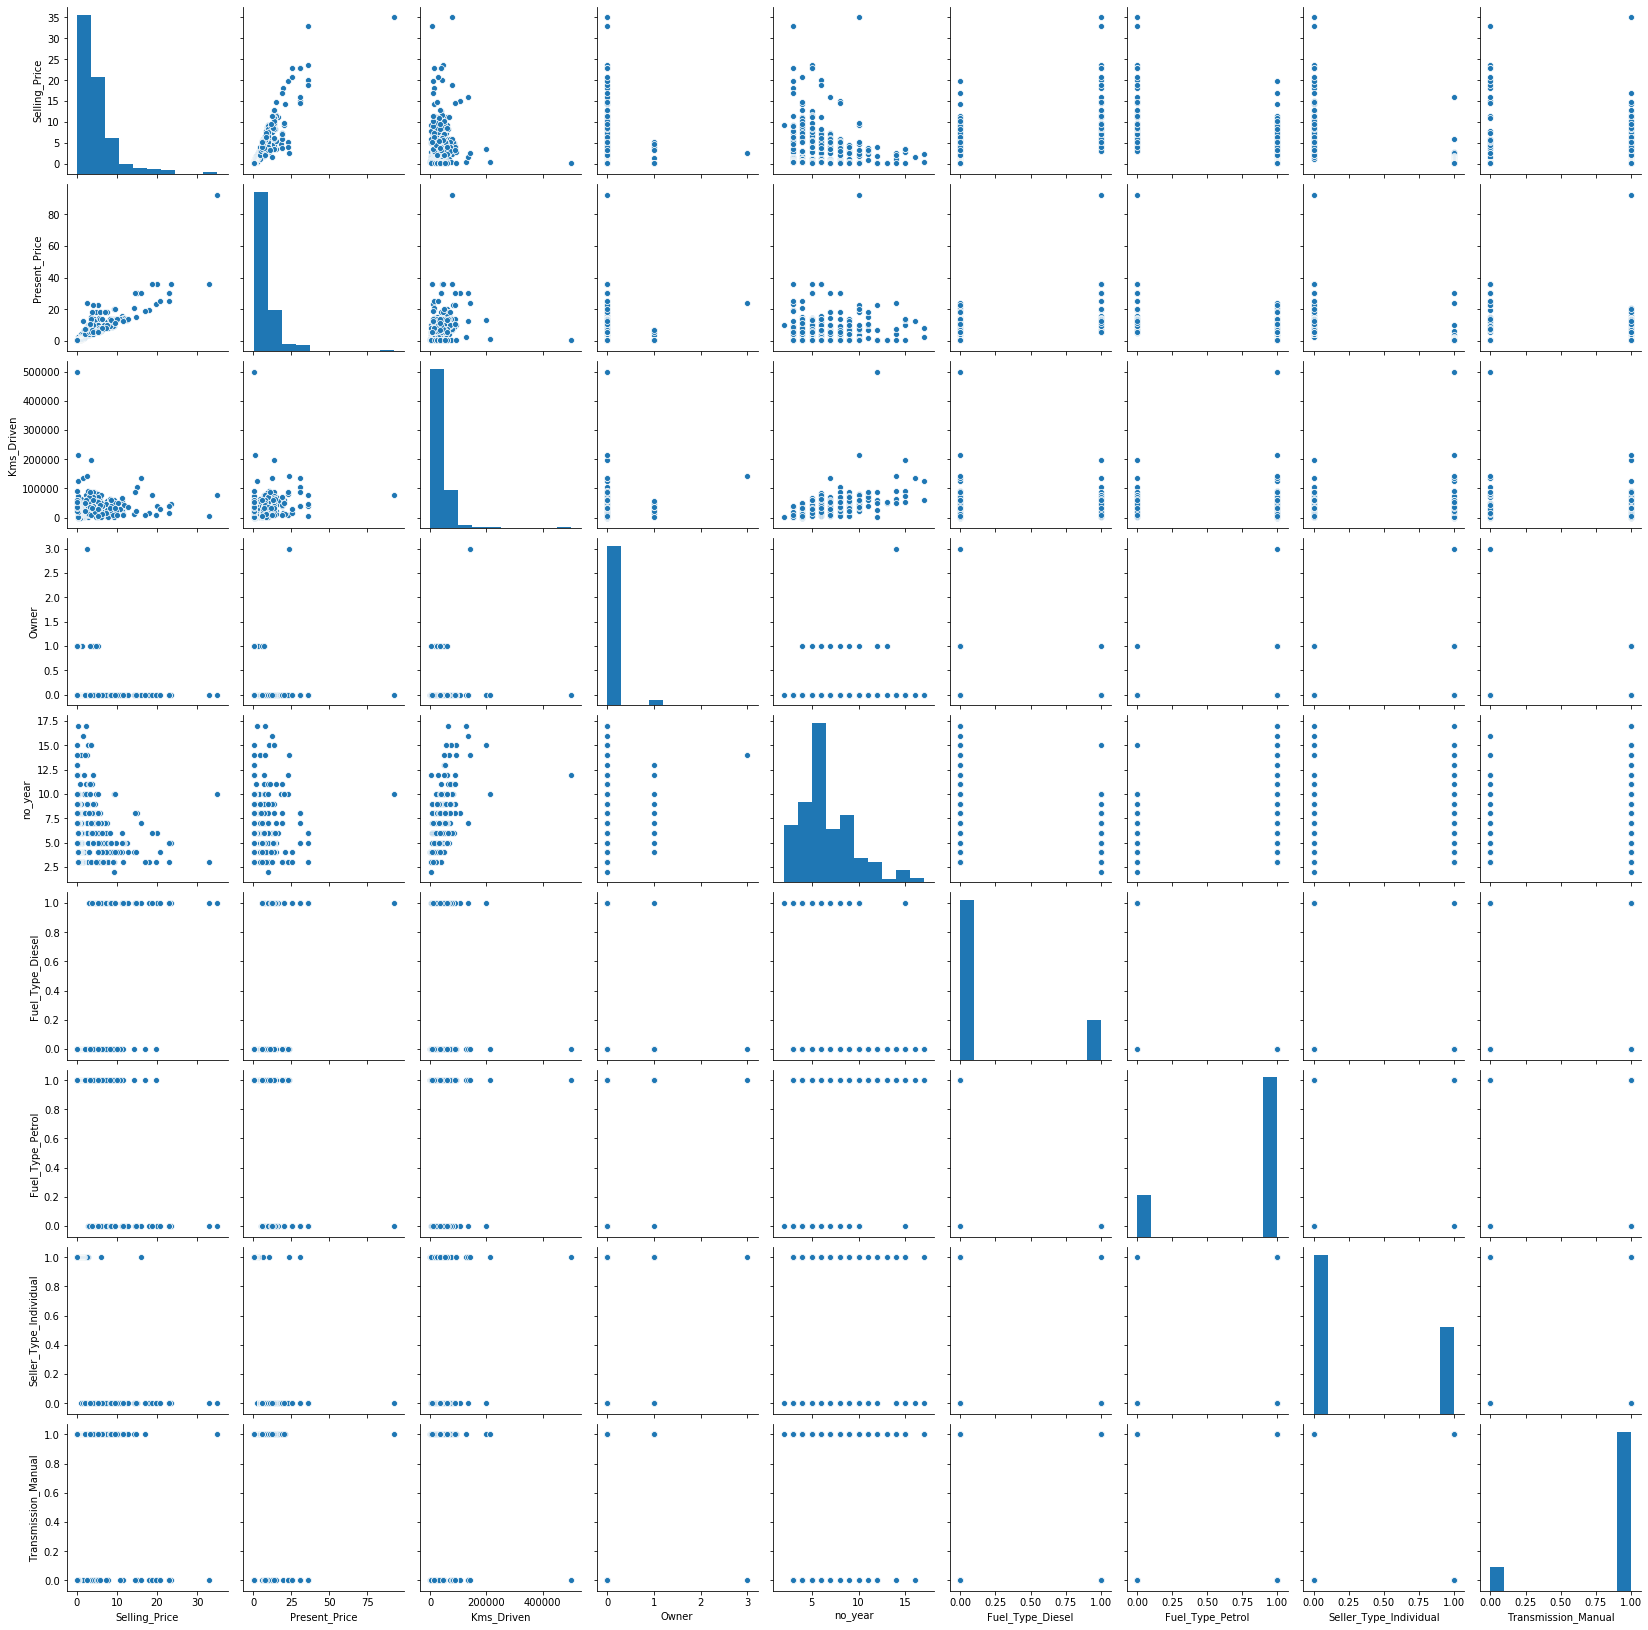

In [20]:
sns.pairplot(final_ds)

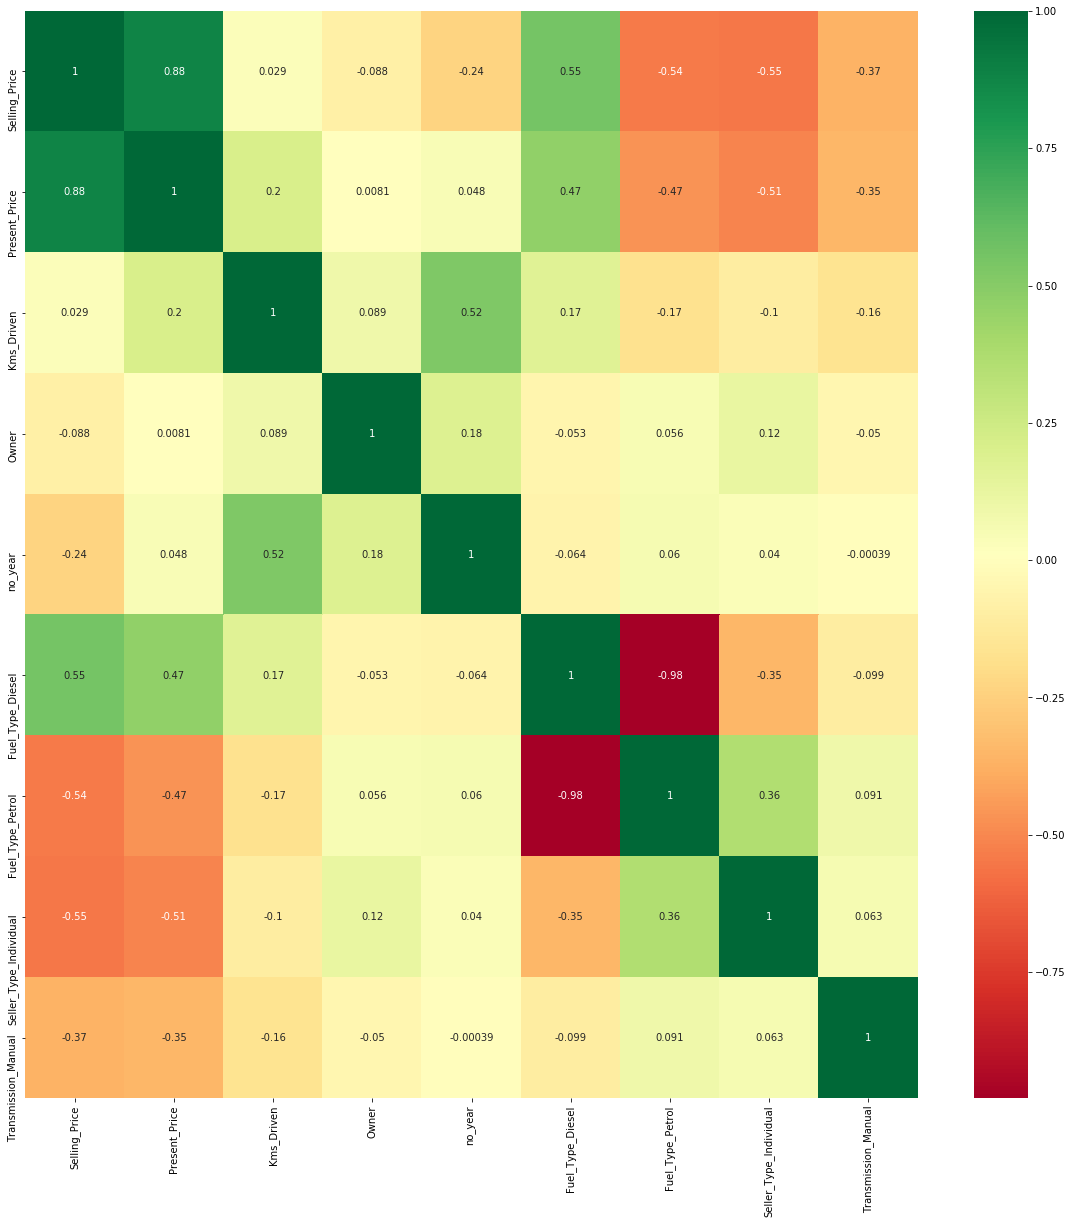

In [21]:
cormat = final_ds.corr()
top_corr_features= cormat.index
plt.figure(figsize=(20,20))
g  = sns.heatmap(final_ds[top_corr_features].corr(),annot = True,cmap ="RdYlGn")

In [22]:
x = final_ds.iloc[: , 1:]
y = final_ds.iloc[:,0]

In [23]:
x.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [24]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [25]:
# feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [26]:
print(model.feature_importances_)

[0.3835367  0.03793637 0.0012995  0.08016236 0.23795734 0.00481044
 0.12071438 0.13358291]


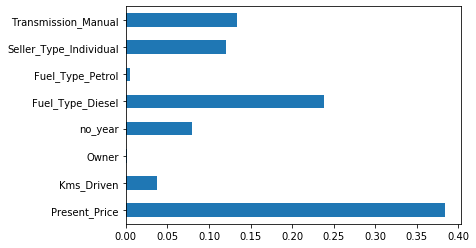

In [27]:
#plot a graph of features for better knowing the importance of every feature
feature_importance = pd.Series(model.feature_importances_,index = x.columns)
feature_importance.plot(kind ='barh')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [29]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [30]:
#hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 100,stop=1200,num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [31]:
#Randomized serch cv 

# number of tree in random forest
n_estimators = [int(x) for x in np.linspace(start = 100,stop=1200,num = 12)]
# number of feature to consider at every split
max_features = ['auto' , 'sqrt']
# max no of leaves in a tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
# minimum no of sample required to split the node
min_samples_split = [2,5,10,15,100]
# minimum no of samples required at each leaf node
min_samples_leaf= [1 ,2 ,5 ,10]

In [33]:
# random grid
random_grid = { 'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf }
print(random_grid)
               
               


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [41]:
from sklearn.model_selection import RandomizedSearchCV
reg_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid,  n_iter=10, scoring='neg_mean_squared_error', n_jobs=1,   cv=5, verbose=2,  random_state=None,  return_train_score=False)

In [42]:
reg_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.5s
[CV] n_estimators=200, min_samples_s

[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.4s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.4s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.4s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.4s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.4s
[CV] n_estimators=800, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [43]:
y_pred = reg_random.predict(x_test)

In [44]:
print(y_pred)

[ 5.14119091  0.63487273  3.63        0.78756364  2.85172727  0.22642727
 16.68220909  0.46775455  9.54633636  0.19552727  4.01823636  8.73017273
  2.51327273  1.06141818  4.25222727  0.69883636  0.74256364  4.15163636
  0.39906364  5.66590909  8.47322727  0.4288      2.56086364  7.45054545
  5.09913636  6.7405      0.63733636  0.3543      8.62920909  8.9385
  0.46956364  4.76770909  2.51816364  7.24237273  2.69359091  0.68781818
  0.24546364  0.20845455  0.41344545  4.68842727  6.48254545  9.85427273
  4.6245      1.16739091  3.3225      0.44406364  0.42326364  5.68172727
  5.99168182  5.83840909  0.47284545  7.35984545  1.24475455  0.58495455
  0.58710909  3.08909091  3.36681818  9.81062727  4.65381818  1.63872727
  0.23424545]


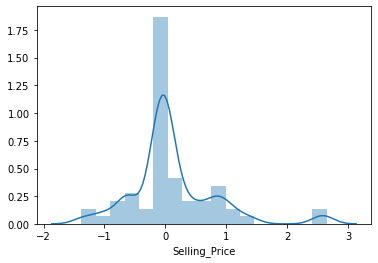

In [45]:
sns.distplot(y_test-y_pred)

<function matplotlib.pyplot.show(*args, **kw)>

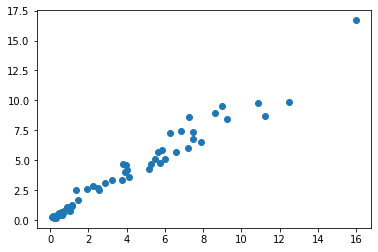

In [46]:
plt.scatter(y_test,y_pred)
plt.show